In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, c, k, pi
from scipy.integrate import simpson
import numpy.linalg as ln

In [2]:
def planck_distribution(T, wavelength_i, wavelength_f, n=1000):
    wavelength = np.linspace(wavelength_i, wavelength_f, n)
    return wavelength, ((8 * pi * h * c) / wavelength**5) * (1 / (np.exp((h * c) / (wavelength * k * T)) - 1))

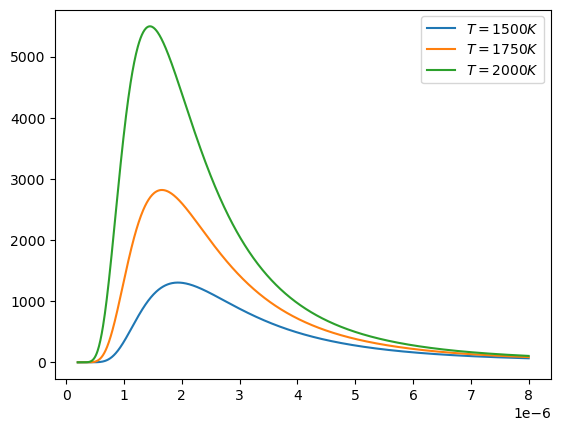

In [3]:
wavelength_i = 0.2e-6
wavelength_f = 8e-6

T = 1500, 1750, 2000

for i in range(len(T)):
    wavelength, distribution = planck_distribution(
        T[i], wavelength_i, wavelength_f)

    plt.plot(wavelength, distribution, label=f"$T={T[i]}K$")

plt.legend()
plt.show()

In [13]:
def integrate_planck_distribution(T_i, T_f, n=10):
    T = np.linspace(T_i, T_f, n)
    R = np.empty(len(T))

    for i in range(len(T)):
        wavelength, distribution = planck_distribution(
            T[i], wavelength_i, wavelength_f)

        R[i] = simpson(distribution, x=wavelength)

    return T, R

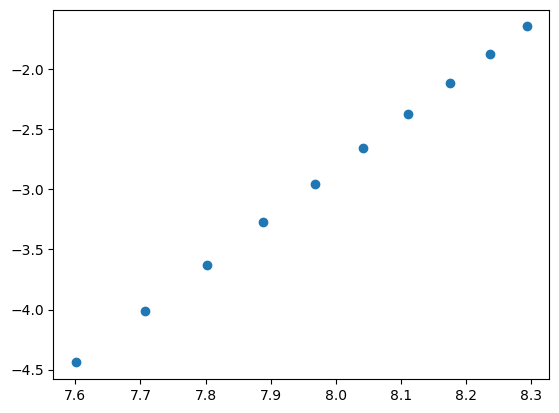

In [14]:
T_i = 2000
T_f = 4000

T, R = integrate_planck_distribution(T_i, T_f)

lnT = np.log(T)
lnR = np.log(R)

plt.plot(lnT, lnR, "o")

In [16]:
A = np.array([[sum(lnT**2), sum(lnT)], [sum(lnT), len(lnT)]])
b = np.array([sum(lnT*lnR), sum(lnR)])

N, lnS = ln.solve(A, b)
print(f"The value of the N is {N:.2f}")
print(f"The value of the Stefan-Boltzman constant is {np.exp(lnS)}")

The value of the N is 4.03
The value of the Stefan-Boltxman constant is 5.84047412712408e-16
